## load Mnist data

In [1]:
import numpy as np
import struct
def load_images(file_name):
    binfile = open(file_name, 'rb') 
    buffers = binfile.read()
    magic,num,rows,cols = struct.unpack_from('>IIII',buffers, 0)
    bits = num * rows * cols
    images = struct.unpack_from('>' + str(bits) + 'B', buffers, struct.calcsize('>IIII'))
    binfile.close()
    images = np.reshape(images, [num, rows * cols])
    return images
def load_labels(file_name):
    binfile = open(file_name, 'rb')  
    buffers = binfile.read()
    magic,num = struct.unpack_from('>II', buffers, 0) 
    labels = struct.unpack_from('>' + str(num) + "B", buffers, struct.calcsize('>II'))
    binfile.close()
    labels = np.reshape(labels, [num])
    return labels  
filename_train_images ='./dataset/train-images.idx3-ubyte'
filename_train_labels ='./dataset/train-labels.idx1-ubyte'
filename_test_images ='./dataset/t10k-images.idx3-ubyte'
filename_test_labels ='./dataset/t10k-labels.idx1-ubyte'
X_train=load_images(filename_train_images)
y_train=load_labels(filename_train_labels)
X_test=load_images(filename_test_images)
y_test=load_labels(filename_test_labels)

In [36]:
X_train[0].shape #(784,) 28x28 image
print(len(X_train), len(y_train))
print(X_train.shape)
print(X_test.shape)
# print(len(X_test),len(y_test))
# print(X_train[0],y_train[0])

60000 60000
(60000, 784)
(10000, 784)


## visualize image

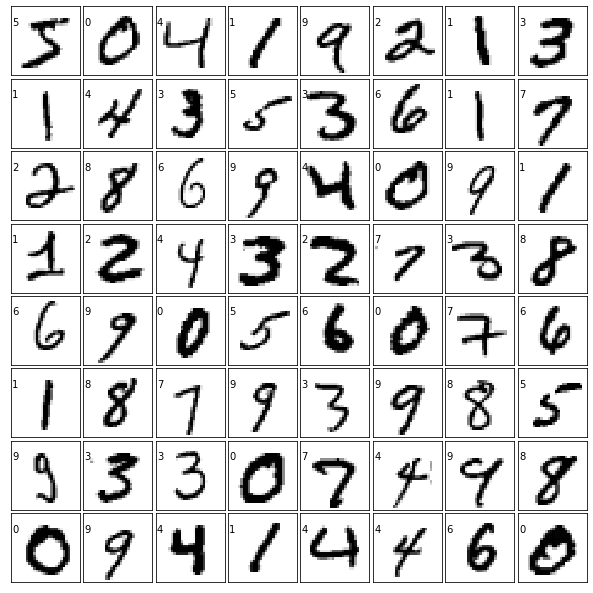

In [4]:
#visualize train image
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(64):
    #show first 64 image(including images and labels)
    images = np.reshape(X_train[i], [28,28])
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(images,cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(y_train[i]))

plt.show()

## PCA dimension reduction and visualize

In [5]:
from sklearn.decomposition import PCA 
#random PCA
randomized_pca = PCA(n_components=2,svd_solver='randomized')
reduced_data_rpca = randomized_pca.fit_transform(X_train.data)
#PCA
pca = PCA(n_components = 2) #reduce 28x28 into 2 dimension
reduced_data_pca = pca.fit_transform(X_train.data)

print(reduced_data_pca.shape)
print(reduced_data_rpca[0])
print(reduced_data_pca[0])

(60000, 2)
[ 123.93050127 -312.65395279]
[ 123.93341887 -312.68340929]


5923 0
6742 1
5958 2
6131 3
5842 4
5421 5
5918 6
6265 7
5851 8
5949 9


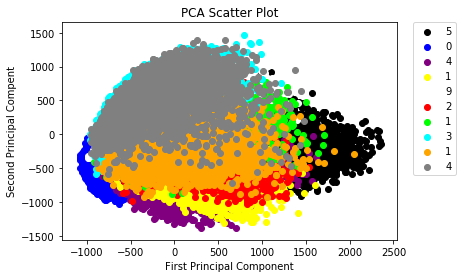

In [6]:
# visualize PCA processed result
import matplotlib.pyplot as plt
colors = ['black','blue','purple','yellow','white','red','lime','cyan','orange','gray'] # corresponding to 0-9
for i in range (len(colors)):
    # to show how many different number in entire train dataset
    # we have reduce the dimension into 2 before, so we can use [x,y] to represent a number
    x = reduced_data_rpca[:,0][y_train == i]
    y = reduced_data_rpca[:,1][y_train == i]
    print(len(x), i) # show how many number in processed dataset
    plt.scatter(x,y,c=colors[i])
plt.legend(y_train, bbox_to_anchor = (1.05,1),loc=2,borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Compent')
plt.title("PCA Scatter Plot")
plt.show()

## KNN Clssifier

In [34]:
#LDA dimension reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(X_train,y_train)
lda_X_train = lda.transform(X_train)
print(lda_X_train.shape)
lda.fit(X_test,y_test)
lda_X_test = lda.transform(X_test)
print(lda_X_test.shape)

(60000, 9)
(10000, 9)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(lda_X_train, y_train)

Wall time: 73.8 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
%time knn_clf.score(lda_X_test, y_test)

Wall time: 2.46 s


0.8875

In [42]:
# PCA dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=5) # the best parameter in PCA
# pca = PCA(n_components=10)
reduced_X_train = pca.fit_transform(X_train.data)
reduced_X_test = pca.fit_transform(X_test.data)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(reduced_X_train, y_train)

Wall time: 48.9 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
%time knn_clf.score(reduced_X_test, y_test)

Wall time: 663 ms


0.2531

## Logistic regression

In [58]:
#LDA dimension reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(X_train,y_train)
lda_X_train = lda.transform(X_train)
print(lda_X_train.shape)
lda.fit(X_test,y_test)
lda_X_test = lda.transform(X_test)
print(lda_X_test.shape)

(60000, 9)
(10000, 9)


In [59]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(penalty='l2')
lg_model.fit(lda_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
predicted = lg_model.predict(lda_X_test)
print(metrics.classification_report(y_test, predicted))
# print(metrics.confusion_matrix(y_test,predicted))
print('LDA dimension accuracy:', accuracy_score(y_test, predicted))

precision    recall  f1-score   support

           0       0.93      0.94      0.93       980
           1       0.93      0.97      0.95      1135
           2       0.92      0.88      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.92      0.91       982
           5       0.88      0.83      0.86       892
           6       0.94      0.94      0.94       958
           7       0.87      0.91      0.89      1028
           8       0.84      0.85      0.85       974
           9       0.86      0.80      0.83      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.90     10000

LDA dimension accuracy: 0.8959


In [48]:
#PCA dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
reduced_X_train = pca.fit_transform(X_train.data)
reduced_X_test = pca.fit_transform(X_test.data)

In [49]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(penalty='l2')
lg_model.fit(reduced_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
predicted = lg_model.predict(reduced_X_test)
print(metrics.classification_report(y_test, predicted))
# print(metrics.confusion_matrix(y_test,predicted))
print('PCA dimension accuracy:', accuracy_score(y_test, predicted))

precision    recall  f1-score   support

           0       0.72      0.92      0.81       980
           1       0.29      0.18      0.22      1135
           2       0.06      0.07      0.06      1032
           3       0.05      0.07      0.06      1010
           4       0.01      0.01      0.01       982
           5       0.51      0.29      0.37       892
           6       0.45      0.38      0.41       958
           7       0.00      0.00      0.00      1028
           8       0.39      0.42      0.41       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.23     10000
   macro avg       0.25      0.23      0.24     10000
weighted avg       0.24      0.23      0.23     10000

PCA dimension accuracy: 0.2294


## SVM Classifier

In [52]:
#LDA dimension reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(X_train,y_train)
lda_X_train = lda.transform(X_train)
print(lda_X_train.shape)
lda.fit(X_test,y_test)
lda_X_test = lda.transform(X_test)
print(lda_X_test.shape)

(60000, 9)
(10000, 9)


In [69]:
## linear SVC
from sklearn import svm
# one vs the rest multi classification
svc_model = svm.SVC(kernel='linear',decision_function_shape='ovo')

print('begin training')
svc_model.fit(lda_X_train,y_train)

begin training


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
predicted = svc_model.predict(lda_X_test)
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, predicted))
# print(metrics.confusion_matrix(y_test,predicted))
print('LDA dimension accuracy:', accuracy_score(y_test, predicted))

precision    recall  f1-score   support

           0       0.95      0.88      0.91       980
           1       0.93      0.74      0.82      1135
           2       0.90      0.91      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.91      0.90       982
           5       0.87      0.85      0.86       892
           6       0.90      0.95      0.92       958
           7       0.70      0.92      0.80      1028
           8       0.85      0.86      0.86       974
           9       0.88      0.81      0.85      1009

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

LDA dimension accuracy: 0.8706


## GBDT Classifier

In [64]:
#LDA dimension reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(X_train,y_train)
lda_X_train = lda.transform(X_train)
print(lda_X_train.shape)
lda.fit(X_test,y_test)
lda_X_test = lda.transform(X_test)
print(lda_X_test.shape)

(60000, 9)
(10000, 9)


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt_model = GradientBoostingClassifier(n_estimators=200)
gbdt_model.fit(lda_X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [66]:
from sklearn.metrics import accuracy_score
predicted = gbdt_model.predict(lda_X_test)
print('LDA dimension accuracy:', accuracy_score(y_test, predicted))

LDA dimension accuracy: 0.866


In [61]:
#PCA dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
reduced_X_train = pca.fit_transform(X_train.data)
reduced_X_test = pca.fit_transform(X_test.data)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt_model = GradientBoostingClassifier(n_estimators=200)
gbdt_model.fit(reduced_X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
from sklearn.metrics import accuracy_score
predicted = gbdt_model.predict(reduced_X_test)
print('PCA dimension accuracy:', accuracy_score(y_test, predicted))

PCA dimension accuracy: 0.2483
